In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

In [168]:
def draw_bar_plot(batting_or_bowling,metrics_summary):
  for metric in batting_or_bowling:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(metrics_summary.index, metrics_summary[(metric, 'max')], label='Max',color='skyblue')
    ax.bar(metrics_summary.index, metrics_summary[(metric, 'mean')], label='mean',color='magenta')
    ax.set_xlabel('Team')
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f"{metric.capitalize()}  Max and mean value")
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()
def draw_px_bar_plot(top10_df, col_name):
    fig = px.bar(top10_df, x='player', y=col_name, title=f'Top 10 players with Most {col_name} value',
                 labels={col_name: f'Total {col_name}', 'player': 'Player Name'},
                 color=col_name, color_continuous_scale='Viridis')

    fig.update_layout(xaxis_title='Player Name', yaxis_title=f'Total {col_name}')
    fig.show()

def draw_px_line_plot(given_df,metric,team_name):
    fig = px.line(given_df, x='start_date', y=metric, title=f'Total {metric} for {team_name} over time',
                  labels={metric: f'Total {metric}', 'start_date': 'Start Date'},
                  color_discrete_sequence=['blue'])

    fig.update_layout(xaxis_title='Start Date', yaxis_title=f'Total {metric}', title_font_size=20)
    fig.update_traces(mode='lines+markers', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)

    # Find the peak and lowest metric values
    peak = given_df[metric].max()
    lowest= given_df[metric].min()

    # Add annotations for peak and lowest metric values
    fig.add_annotation(x=given_df[given_df[metric] == peak]['start_date'].iloc[0],
                       y=peak,
                       text=f"Peak: {peak}",
                       showarrow=True,
                       arrowhead=1)

    fig.add_annotation(x=given_df[given_df['overs'] == lowest]['start_date'].iloc[0],
                       y=lowest,
                       text=f"Lowest: {lowest}",
                       showarrow=True,
                       arrowhead=1)

    fig.show()

In [5]:
# prompt: open my drive and get the data

from google.colab import drive
drive.mount('/content/drive/')

# Get the data from your Google Drive
data_path = '/content/drive/MyDrive/world cup 2023 data/CWC23_all_innings.csv'

# Read the data from the file
df=pd.read_csv(data_path)

Mounted at /content/drive/


In [6]:
df.columns

Index(['team', 'player', 'bat_or_bowl', 'bb_bf', 'runs', 'wkts',
       'wicketball_prob', 'runs_per_ball', 'opposition', 'ground',
       'start_date', 'overs', 'mdns', 'econ', 'inns', '4s', '6s', 'sr',
       'not_out', 'mins'],
      dtype='object')

In [7]:
df.head(10)

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.050000,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.050000,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.050000,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.050000,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.050000,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
5,AFG,Mujeeb Ur Rahman (AFG),bowl,60,51,3.0,0.050000,0.850000,v England,Delhi,15-Oct-23,10.0,1.0,5.10,2,NaN,NaN,NaN,NaN,NaN
6,ENG,AU Rashid (ENG),bowl,48,54,3.0,0.062500,1.125000,v Netherlands,Pune,8-Nov-23,8.0,0.0,6.75,2,NaN,NaN,NaN,NaN,NaN
7,NED,LV van Beek (NED),bowl,53,60,3.0,0.056604,1.132075,v South Africa,Dharamsala,17-Oct-23,8.5,0.0,6.79,2,NaN,NaN,NaN,NaN,NaN
8,BAN,Mehidy Hasan Miraz (BAN),bowl,54,60,3.0,0.055556,1.111111,v Pakistan,Eden Gardens,31-Oct-23,9.0,0.0,6.66,2,NaN,NaN,NaN,NaN,NaN
9,PAK,Mohammad Wasim (1) (PAK),bowl,60,60,3.0,0.050000,1.000000,v New Zealand,Bengaluru,4-Nov-23,10.0,0.0,6.00,1,NaN,NaN,NaN,NaN,NaN


# let's understand our columns

- team: This column represents the name of the team participating in the World
Cup match.

- player: This column contains the name of the player who performed in the match. Players are selected from the team to either bat or bowl during a match.

- bat_or_bowl: This column indicates whether the player batted or bowled in the match. It distinguishes between the two primary roles in cricket.

- bb_bf: The "bb_bf" column represents the number of balls faced by a batsman or bowled by a bowler. In batting, it shows how many balls the batsman has faced during their innings. In bowling, it represents the number of balls bowled by the player.

- runs: The "runs" column indicates the number of runs scored by a batsman or conceded by a bowler.

- wkts: For the bowling team, taking wickets is considered a positive outcome. It is one of the main objectives for the bowlers as it helps in restricting the opposing team's score and increases the chances of winning the match. Bowlers aim to take wickets by delivering the ball in a way that confuses or deceives the batsman, leading to a dismissal.On the other hand, for the batting team, losing a wicket is considered a negative outcome. When a batsman gets out (loses their wicket), it reduces the number of batsmen available to score runs and increases the pressure on the remaining batsmen. The batting team aims to avoid losing wickets and build partnerships to score runs and set a competitive total.

- wicketball_prob: The "wicketball_prob" column denotes the probability of a bowler taking a wicket with each ball they bowl. It provides an insight into the bowler's effectiveness and their ability to take wickets.

- runs_per_ball: This column represents the average number of runs scored or conceded per ball. It is calculated by dividing the total runs by the total number of balls faced or bowled.

- opposition: The "opposition" column indicates the name of the opposing team that the player's team was facing in the match.

- ground: This column contains the name of the cricket ground where the match took place. Different cricket grounds can have varying conditions, which can influence the gameplay.

- start_date: The "start_date" column represents the date when the match started. It provides the chronological information about when the game took place.

- overs: In cricket, an over consists of six deliveries (balls) bowled by a bowler. The "overs" column indicates the number of overs bowled by the player.

- mdns: The "mdns" column represents the number of maiden overs bowled by the player. A maiden over is an over in which no runs are scored by the batsman. It indicates the bowler's ability to restrict the opposition from scoring runs.

- econ: The "econ" column denotes the economy rate of a bowler. It is calculated as the average number of runs conceded by the bowler per over bowled.
A lower economy rate indicates that a bowler is conceding fewer runs per over, which is generally desirable for a bowling side. It is a key metric to assess a bowler's effectiveness in limiting the scoring opportunities for the batting side.

- inns: The "inns" column indicates the innings in which the player batted or bowled. A cricket match typically consists of two innings for each team, and this column specifies the relevant innings.

- 4s: The "4s" column represents the number of fours hit by a batsman. A four refers to a boundary where the ball reaches the fence after hitting the ground.

- 6s: The "6s" column indicates the number of sixes hit by a batsman. A six occurs when the ball is hit over the boundary rope without touching the ground.

- sr: The "sr" column denotes the strike rate of a batsman. It is calculated as the number of runs scored by the batsman per 100 balls faced. It provides an indication of the batsman's scoring rate.

- not_out: The "not_out" column indicates whether the batsman remained not out, meaning they were not dismissed, in the innings. It helps determine whether the batsman completed their innings or if they wereinterrupted or dismissed before the completion of their batting innings.

- mins: The "mins" column represents the number of minutes the batsman spent at the crease during their innings. It provides an indication of the duration of the batsman's stay at the wicket.

# key performance metrics for both batters and bowlers

**For Batters (Batting Performance Metrics):**

- **Runs**: Increase is better. More runs scored indicates better batting performance.
- **Balls Faced (bb_bf)**: Increase is generally better, as it means the batsman has spent more time at the crease and had more opportunities to score runs.
- **Strike Rate (SR)**: Increase is better, but it depends on the match situation. A higher strike rate indicates faster scoring, but sometimes a lower strike rate might be preferable for building an innings.
- **Number of Boundaries (4s and 6s)**: Increase is better, as hitting boundaries is a sign of attacking batting.
- **Not Out**: No strict preference. Remaining not out indicates that the batsman was not dismissed, which can be positive, especially in limited-overs formats where preserving wickets is important.
- **Minutes**: Increase is generally better, as it indicates the batsman spent more time at the crease, but it depends on the match context.

**For Bowlers (Bowling Performance Metrics):**

- **Overs**: Increase is generally better, as it means the bowler has contributed more overs to the team's bowling effort.
- **Maidens (mdns)**: Increase is better, as it indicates the bowler has been able to keep the batsmen from scoring runs in more overs.
- **Wickets (wkts)**: Increase is better. Taking wickets is the primary goal of a bowler as it puts pressure on the batting side and helps in restricting the opposition's score.
- **Economy Rate (econ)**: Decrease is better. A lower economy rate indicates the bowler is conceding fewer runs per over, which means they are bowling more economically and keeping the scoring under control.
- **Runs per Ball**: Decrease is better. A lower runs per ball indicates the bowler is conceding fewer runs on average per delivery.
- **Strike Rate (SR)**: Decrease is better. A lower strike rate indicates the bowler is taking wickets more frequently, which is a sign of their effectiveness.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

**check null values**

In [9]:
df.isnull().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

In [10]:
df[df['wkts'].isnull()]

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
501,AUS,GJ Maxwell (AUS),bat,128,201,NaN,0.000000,1.5703,v Afghanistan,Wankhede,7-Nov-23,NaN,NaN,NaN,2,21.0,10.0,157.03,1.0,181.0
502,SA,Q de Kock (SA),bat,140,174,NaN,0.007143,1.2428,v Bangladesh,Wankhede,24-Oct-23,NaN,NaN,NaN,1,15.0,7.0,124.28,0.0,192.0
503,AUS,DA Warner (AUS),bat,124,163,NaN,0.008065,1.3145,v Pakistan,Bengaluru,20-Oct-23,NaN,NaN,NaN,1,14.0,9.0,131.45,0.0,180.0
504,NZ,DP Conway (NZ),bat,121,152,NaN,0.000000,1.2561,v England,Ahmedabad,5-Oct-23,NaN,NaN,NaN,2,19.0,3.0,125.61,1.0,147.0
505,ENG,DJ Malan (ENG),bat,107,140,NaN,0.009346,1.3084,v Bangladesh,Dharamsala,10-Oct-23,NaN,NaN,NaN,1,16.0,5.0,130.84,0.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,AUS,GJ Maxwell (AUS),bat,5,1,NaN,0.200000,0.2000,v South Africa,Eden Gardens,16-Nov-23,NaN,NaN,NaN,2,0.0,0.0,20.00,0.0,8.0
1381,NZ,TWM Latham (NZ),bat,2,0,NaN,0.500000,0.0000,v India,Wankhede,15-Nov-23,NaN,NaN,NaN,2,0.0,0.0,0.00,0.0,1.0
1382,SA,T Bavuma (SA),bat,4,0,NaN,0.250000,0.0000,v Australia,Eden Gardens,16-Nov-23,NaN,NaN,NaN,1,0.0,0.0,0.00,0.0,5.0
1383,SA,M Jansen (SA),bat,1,0,NaN,1.000000,0.0000,v Australia,Eden Gardens,16-Nov-23,NaN,NaN,NaN,1,0.0,0.0,0.00,0.0,1.0


## we can see that we've 846 null value in {wckts,overs,mdns,econ} it means that those players haven't played as bowlers and 562 null value in {4s,6s,sr,not_out,mins} which means that those players haven't played as batters


**check dublicates**

In [11]:
df.duplicated().sum()

2

In [12]:
df.drop_duplicates(inplace=True)



> # **Team Performance Analysis**



## **here i'll evaluate the teams based on the batting/bowling performance metrics**





In [14]:
batting_performance_metrics=['runs','bb_bf','sr','4s','6s','not_out','mins'] # bat_or_bowl==bat
bowling_performance_metics=['overs','mdns','wkts','econ','runs_per_ball']    #bat_or_bowl==bowl



In [15]:
df['team'].unique()

array(['PAK', 'ENG', 'NZ', 'AFG', 'NED', 'BAN', 'SA', 'SL', 'AUS', 'IND'],
      dtype=object)

we have 10 teams

## **Analysis on top performing teams in batting**

In [159]:
for col in batting_performance_metrics:
  print(f'the team that has the max value of {col} is : ')
  print(df[df[col]==df[col].max()]['team'])

the team that has the max value of runs is : 
501    AUS
Name: team, dtype: object
the team that has the max value of bb_bf is : 
510    AFG
Name: team, dtype: object
the team that has the max value of sr is : 
1049    SA
Name: team, dtype: object
the team that has the max value of 4s is : 
501    AUS
Name: team, dtype: object
the team that has the max value of 6s is : 
511    PAK
Name: team, dtype: object
the team that has the max value of not_out is : 
501     AUS
504      NZ
507     PAK
510     AFG
511     PAK
       ... 
1358    IND
1364    AUS
1365    AUS
1376     NZ
1378     SA
Name: team, Length: 128, dtype: object
the team that has the max value of mins is : 
510    AFG
Name: team, dtype: object


In [169]:
batting_metrics_summary = df[df['bat_or_bowl'] == 'bat'].groupby('team')[batting_performance_metrics].agg(['min', 'max','mean'])
batting_metrics_summary

runs                 bb_bf                   sr                       4s  \
      min  max       mean   min  max       mean  min     max        mean  min   
team                                                                            
AFG     0  129  26.891892     1  143  32.324324  0.0  194.44   77.648378  0.0   
AUS     0  201  29.268817     1  132  29.967742  0.0  264.28   85.571290  0.0   
BAN     0  111  21.842697     1  111  27.629213  0.0  233.33   73.812022  0.0   
ENG     0  140  22.010309     1  107  23.463918  0.0  300.00   90.329278  0.0   
IND     0  131  42.575758     1  121  40.681818  0.0  200.00  100.259545  0.0   
NED     0   78  17.632653     1   89  23.469388  0.0  255.55   67.748061  0.0   
NZ      0  152  33.481481     1  127  32.296296  0.0  250.00   97.041605  0.0   
PAK     0  131  29.600000     1  121  30.760000  0.0  220.00   86.619067  0.0   
SA      0  174  31.873563     1  140  32.034483  0.0  600.00   98.443218  0.0   
SL      0  122  23.119048     0  107  26.869048  0.0  200.00   66.799048  0.0   

      ...             6s                 not_out                mins         \
      ...      mean  min   max      mean     min  max      mean  min    max   
team  ...                                                                     
AFG   ...  2.405405  0.0   4.0  0.567568     0.0  1.0  0.162162  1.0  217.0   
AUS   ...  2.849462  0.0  10.0  0.989247     0.0  1.0  0.161290  1.0  182.0   
BAN   ...  2.112360  0.0   4.0  0.483146     0.0  1.0  0.146067  1.0  163.0   
ENG   ...  2.226804  0.0   6.0  0.525773     0.0  1.0  0.123711  1.0  140.0   
IND   ...  4.015152  0.0   8.0  1.348485     0.0  1.0  0.272727  1.0  195.0   
NED   ...  1.663265  0.0   6.0  0.336735     0.0  1.0  0.102041  1.0  122.0   
NZ    ...  3.271605  0.0   7.0  1.012346     0.0  1.0  0.185185  1.0  192.0   
PAK   ...  2.933333  0.0  11.0  0.800000     0.0  1.0  0.133333  2.0  193.0   
SA    ...  2.793103  0.0   8.0  1.137931     0.0  1.0  0.172414  1.0  192.0   
SL    ...  2.392857  0.0   8.0  0.535714     0.0  1.0  0.095238  1.0  168.0   

                 
           mean  
team             
AFG   46.783784  
AUS   43.978495  
BAN   40.438202  
ENG   34.020619  
IND   58.803030  
NED   32.316327  
NZ    48.086420  
PAK   44.533333  
SA    46.931034  
SL    39.547619  

[10 rows x 21 columns]

In [170]:
for col in batting_performance_metrics:
    max_mean = batting_metrics_summary[(col, 'mean')].idxmax()
    print(f"Team with the maximum mean value for {col}: {max_mean}")

Team with the maximum mean value for runs: IND
Team with the maximum mean value for bb_bf: IND
Team with the maximum mean value for sr: IND
Team with the maximum mean value for 4s: IND
Team with the maximum mean value for 6s: IND
Team with the maximum mean value for not_out: IND
Team with the maximum mean value for mins: IND


In [171]:
for col in batting_performance_metrics:
    sorted_teams = batting_metrics_summary.sort_values((col, 'mean'), ascending=False)  # Sort teams based on mean value in descending order
    print(f"Sorted teams based on mean value (highest to lowest) for {col}:")
    for team in sorted_teams.index:
        print(team)
    print()


Sorted teams based on mean value (highest to lowest) for runs:
IND
NZ
SA
PAK
AUS
AFG
SL
ENG
BAN
NED

Sorted teams based on mean value (highest to lowest) for bb_bf:
IND
AFG
NZ
SA
PAK
AUS
BAN
SL
NED
ENG

Sorted teams based on mean value (highest to lowest) for sr:
IND
SA
NZ
ENG
PAK
AUS
AFG
BAN
NED
SL

Sorted teams based on mean value (highest to lowest) for 4s:
IND
NZ
PAK
AUS
SA
AFG
SL
ENG
BAN
NED

Sorted teams based on mean value (highest to lowest) for 6s:
IND
SA
NZ
AUS
PAK
AFG
SL
ENG
BAN
NED

Sorted teams based on mean value (highest to lowest) for not_out:
IND
NZ
SA
AFG
AUS
BAN
PAK
ENG
NED
SL

Sorted teams based on mean value (highest to lowest) for mins:
IND
NZ
SA
AFG
PAK
AUS
BAN
SL
ENG
NED



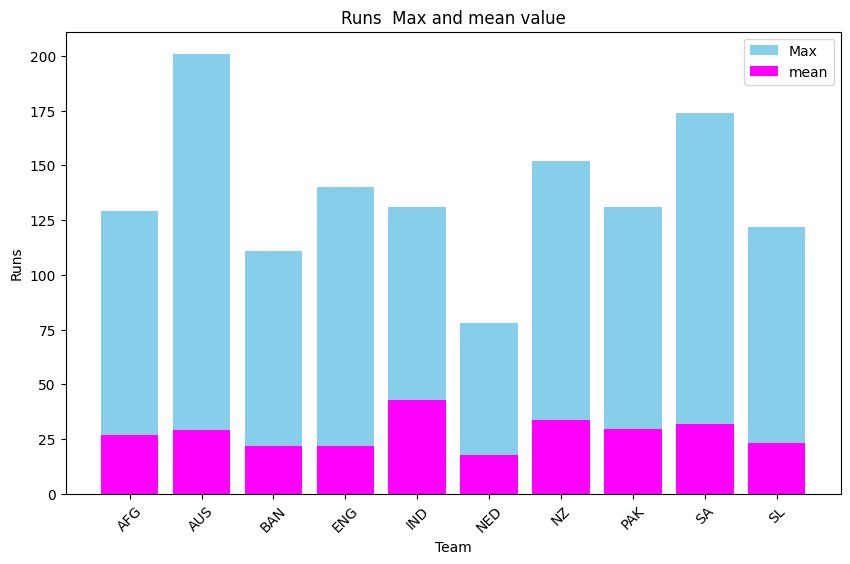

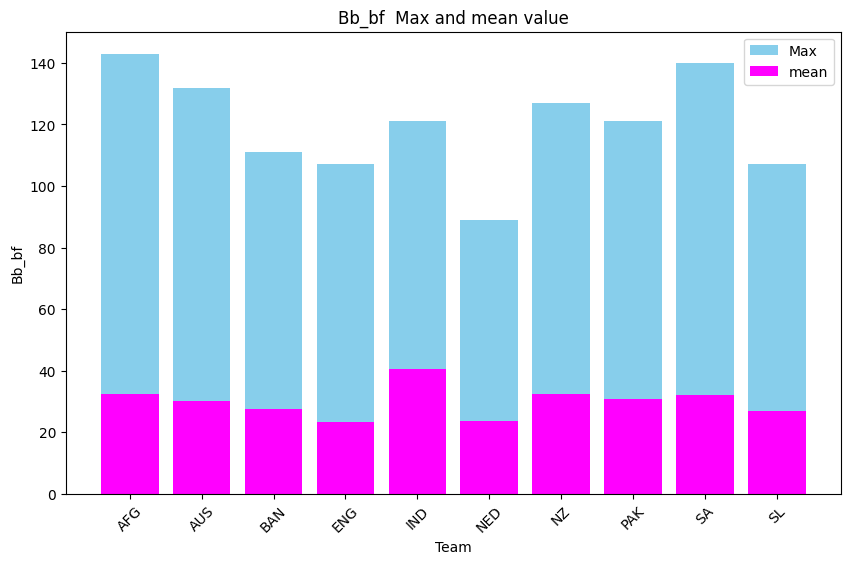

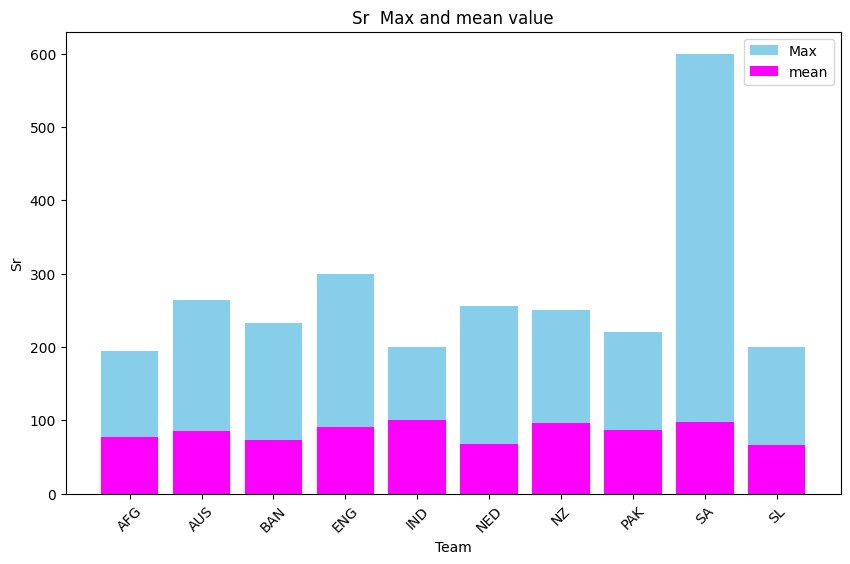

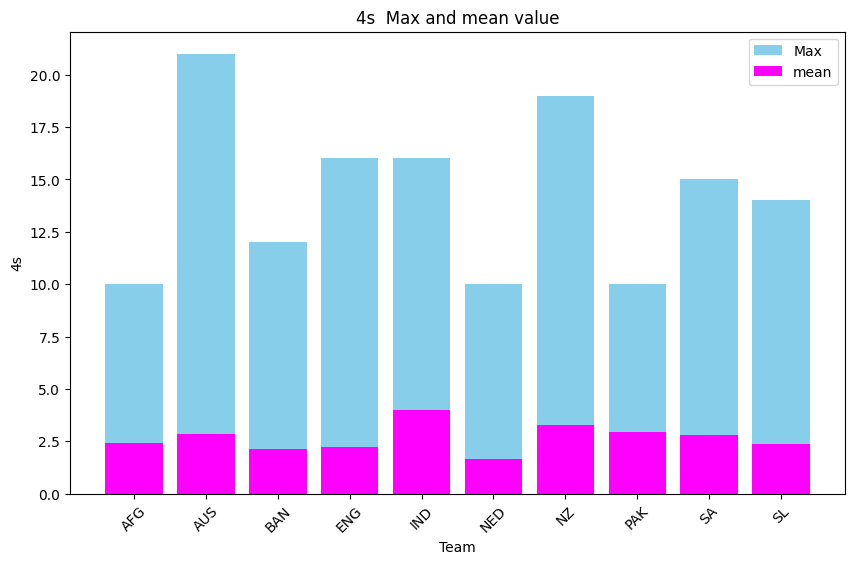

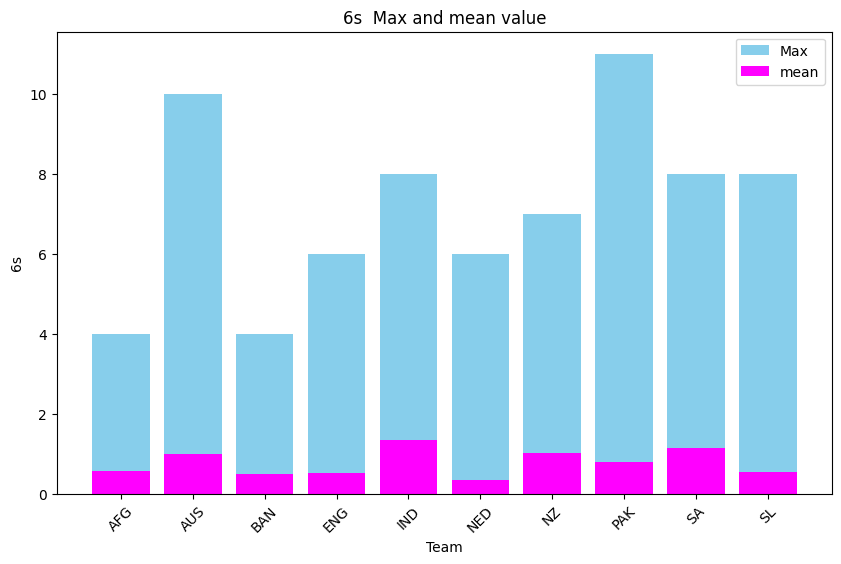

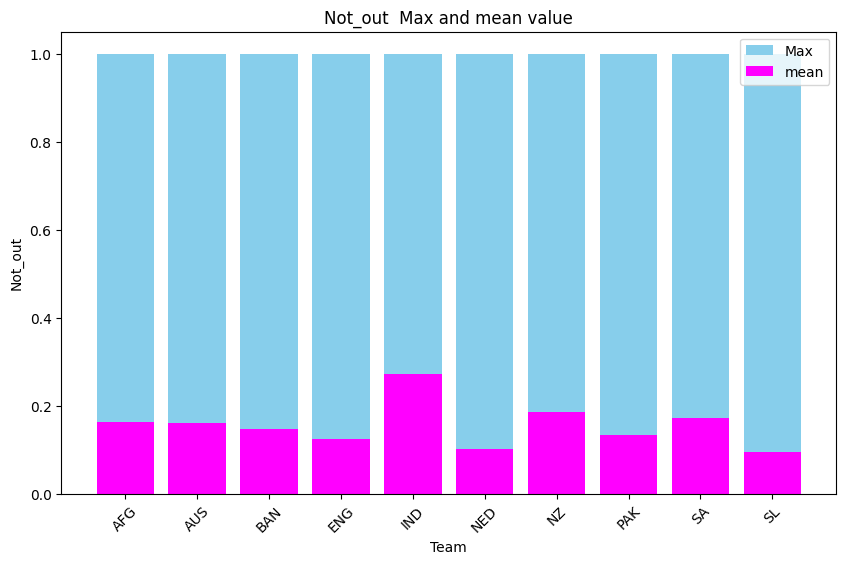

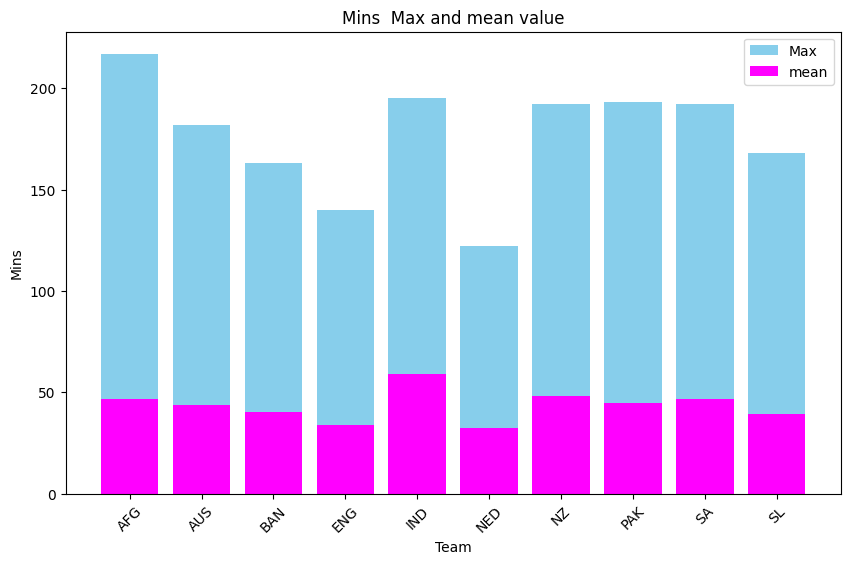

In [172]:
draw_bar_plot(batting_performance_metrics,batting_metrics_summary)

## ***insights***


*   the team that scored the max number of **runs** is **AUS** and highest mean value is **IND**
*   the team that scored the max number of **bb_bf** is **AFG** and highest mean value is **IND**
*   the team that scored the max number of **sr** is **SA** and highest mean value is **IND**
*   the team that scored the max number of **4s** is **AUS** and highest mean value is **IND**
*   the team that scored the max number of **6s** is **PAK** and highest mean value is **IND**
*   the team that scored the max number of **mins** is **AFG** and highest mean value is **IND**
*   all the teams scored the same number of min and max **not_out** equel to 0 and  1 nd highest mean value is **IND**

- ## the least performing teams in batting are **SL,ENG,BAN,NED** and the top performing teams are **IND,NZ,AUS,AFG,SA,PAK**


## **Analysis on top performing teams in bowling**

In [21]:
for col in bowling_performance_metics:
  print(f'the team that has the max value of {col} is : ')
  print(df[df[col]==df[col].max()]['team'])

the team that has the max value of overs is : 
0       PAK
1       ENG
2        NZ
3        NZ
4       AFG
       ... 
1397    IND
1399     NZ
1401    AUS
1403     NZ
1406    IND
Name: team, Length: 168, dtype: object
the team that has the max value of mdns is : 
78      BAN
90       NZ
206     NED
1389    AUS
Name: team, dtype: object
the team that has the max value of wkts is : 
1385    IND
Name: team, dtype: object
the team that has the max value of econ is : 
226     NZ
332    IND
Name: team, dtype: object
the team that has the max value of runs_per_ball is : 
1049    SA
Name: team, dtype: object


In [22]:
bowling_metrics_summary=df[df['bat_or_bowl']=='bowl'].groupby('team')[bowling_performance_metics].agg(['min','max','mean'])
bowling_metrics_summary

overs                 mdns                wkts                 econ  \
       min   max      mean  min  max      mean  min  max      mean   min   
team                                                                       
AFG    1.0  10.0  7.256364  0.0  1.0  0.236364  0.0  4.0  0.963636  2.66   
AUS    1.0  10.0  7.230645  0.0  3.0  0.209677  0.0  4.0  1.241935  1.50   
BAN    1.0  10.0  7.634615  0.0  3.0  0.250000  0.0  4.0  0.980769  2.77   
ENG    3.0  10.0  7.333962  0.0  2.0  0.264151  0.0  4.0  1.226415  2.71   
IND    0.3  10.0  7.162069  0.0  2.0  0.396552  0.0  7.0  1.620690  1.35   
NED    1.0  10.0  7.054237  0.0  3.0  0.186441  0.0  4.0  1.067797  2.60   
NZ     0.3  10.0  7.130159  0.0  3.0  0.269841  0.0  5.0  1.126984  2.00   
PAK    2.0  10.0  7.934615  0.0  1.0  0.153846  0.0  5.0  1.250000  2.55   
SA     2.0  10.0  7.861111  0.0  2.0  0.370370  0.0  4.0  1.629630  2.25   
SL     1.0  10.0  6.953704  0.0  2.0  0.222222  0.0  5.0  0.925926  2.52   

                      runs_per_ball                      
        max      mean           min       max      mean  
team                                                     
AFG   12.00  5.763818      0.444444  2.000000  0.960929  
AUS   12.00  5.661129      0.250000  2.000000  0.943872  
BAN   11.16  6.095769      0.462963  1.861111  1.016412  
ENG   11.50  6.068302      0.452381  1.916667  1.011806  
IND   16.00  4.963793      0.225806  2.666667  0.827580  
NED   11.50  6.170339      0.433333  1.916667  1.028768  
NZ    16.00  6.237143      0.333333  2.666667  1.039779  
PAK   10.50  6.286923      0.425926  1.750000  1.048316  
SA    13.50  5.682778      0.375000  2.250000  0.947549  
SL    11.75  6.606111      0.420000  1.958333  1.101300

In [23]:
for col in bowling_performance_metics[:len(bowling_performance_metics)-2]:
    max_mean = bowling_metrics_summary[(col, 'mean')].idxmax()
    print(f"Team with the maximum mean value for {col}: {max_mean}")
for col in bowling_performance_metics[3:]:
    min_mean = bowling_metrics_summary[(col, 'mean')].idxmin()
    print(f"Team with the minimum mean value for {col}: {min_mean}")


Team with the maximum mean value for overs: PAK
Team with the maximum mean value for mdns: IND
Team with the maximum mean value for wkts: SA
Team with the minimum mean value for econ: IND
Team with the minimum mean value for runs_per_ball: IND


In [24]:
for col in bowling_performance_metics:
  bowling_sorted_teams=bowling_metrics_summary.sort_values((col, 'mean'), ascending=False)
  print(f"Sorted teams based on mean value (highest to lowest) for {col}:")
  for team in bowling_sorted_teams.index:
    print(team)
  print()

Sorted teams based on mean value (highest to lowest) for overs:
PAK
SA
BAN
ENG
AFG
AUS
IND
NZ
NED
SL

Sorted teams based on mean value (highest to lowest) for mdns:
IND
SA
NZ
ENG
BAN
AFG
SL
AUS
NED
PAK

Sorted teams based on mean value (highest to lowest) for wkts:
SA
IND
PAK
AUS
ENG
NZ
NED
BAN
AFG
SL

Sorted teams based on mean value (highest to lowest) for econ:
SL
PAK
NZ
NED
BAN
ENG
AFG
SA
AUS
IND

Sorted teams based on mean value (highest to lowest) for runs_per_ball:
SL
PAK
NZ
NED
BAN
ENG
AFG
SA
AUS
IND



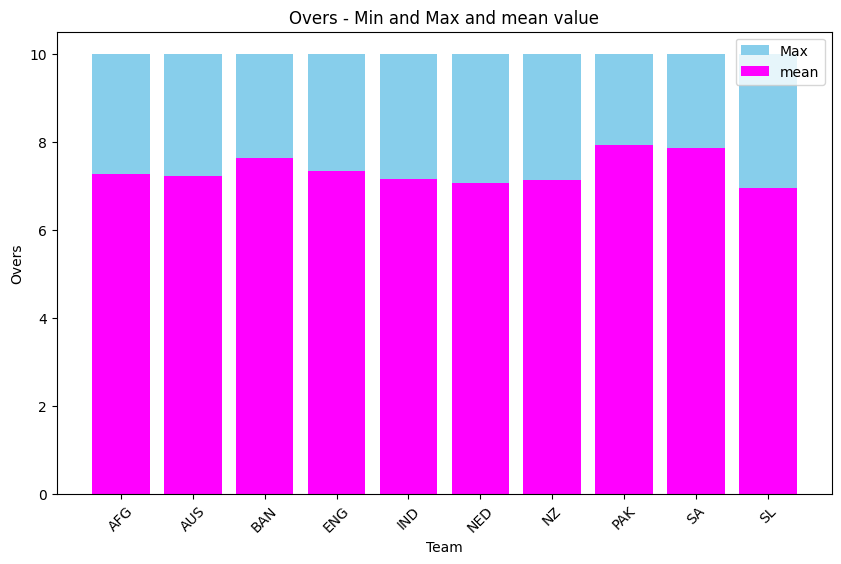

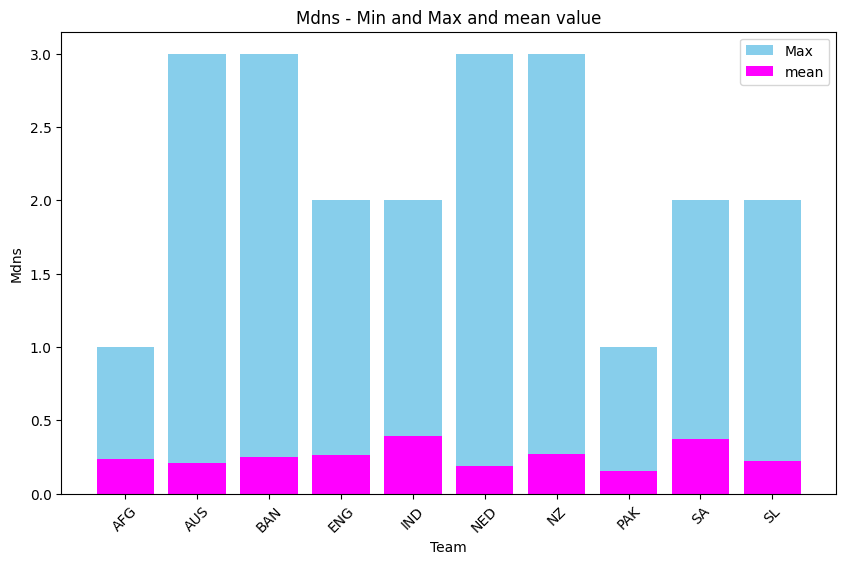

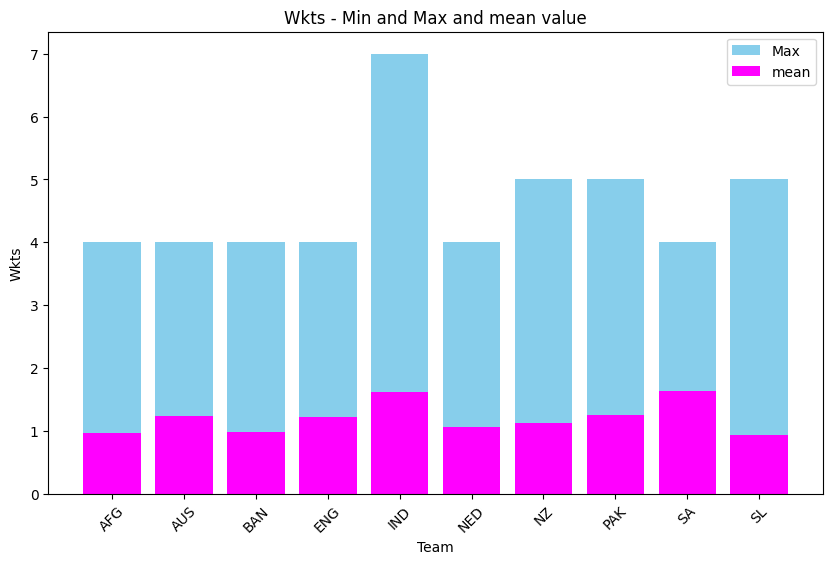

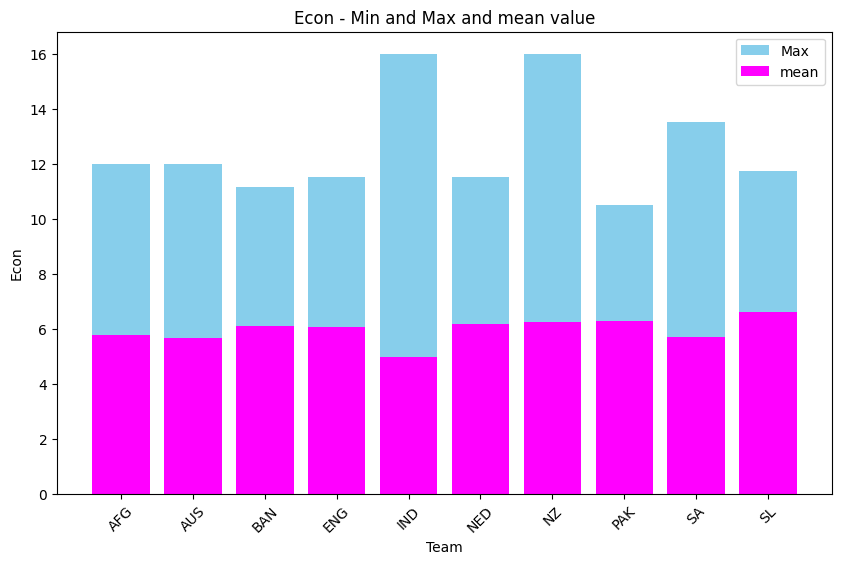

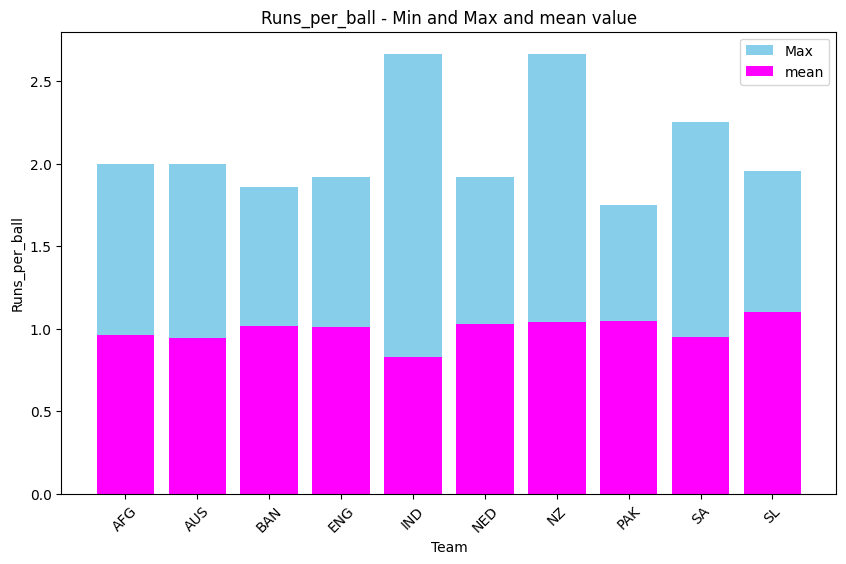

In [25]:
draw_bar_plot(bowling_performance_metics,bowling_metrics_summary)

## ***insights***


*   all the teams scored the same max number of **overs**, but **PAK** scored the highest mean value
*   the teams that scored the max number of **mdns** are **BAN, NZ,NED,AUS** and highest mean value is **IND**
*   the team that scored the max number of **wkts** is **IND** and highest mean value is **SA**
*   the teams that scored the min number of **econ** is **IND** and least minimum mean value is also **IND**
*   the team that scored the min number of **runs_per_ball** is **IND** and least minimum mean value is also **IND**


- # from the previous analysis, we can't conclude which best or worst performing teams in bowling but it's obvious that **IND** has the best performance in bowling and batting so far

> # **Player Performance Analysis**

# **Top Batters Performance**




In [26]:
Top10_batters_performance=[]
for col in batting_performance_metrics:
  Top10_batters_accordingTo_colX=df[df['bat_or_bowl']=='bat'].groupby('player')[col].sum().sort_values(ascending=False).reset_index().head(10)
  Top10_batters_performance.append(Top10_batters_accordingTo_colX)


### **top 10 batters performance according to runs**

In [27]:
Top10_batters_performance[0]

,player,runs
0,V Kohli (IND),711
1,Q de Kock (SA),594
2,R Ravindra (NZ),578
3,DJ Mitchell (NZ),552
4,RG Sharma (IND),550
5,DA Warner (AUS),528
6,SS Iyer (IND),526
7,HE van der Dussen (SA),448
8,MR Marsh (AUS),426
9,AK Markram (SA),406


In [28]:
#visualize
draw_px_bar_plot(Top10_batters_performance[0],'runs')


### **top 10 batters performance according to bb_bf**

In [29]:
Top10_batters_performance[1]

,player,bb_bf
0,V Kohli (IND),784
1,Q de Kock (SA),555
2,R Ravindra (NZ),543
3,HE van der Dussen (SA),530
4,DJ Mitchell (NZ),497
5,Ibrahim Zadran (AFG),493
6,DA Warner (AUS),491
7,SS Iyer (IND),465
8,SA Engelbrecht (NED),450
9,RG Sharma (IND),443


In [30]:
draw_px_bar_plot(Top10_batters_performance[1],'bb_bf')

### **top 10 batters performance according to sr**

In [31]:
Top10_batters_performance[2]

,player,sr
0,AK Markram (SA),1515.25
1,RG Sharma (IND),1255.26
2,DA Miller (SA),1233.46
3,H Klaasen (SA),1231.95
4,DA Warner (AUS),1081.99
5,GD Phillips (NZ),1075.90
6,Q de Kock (SA),1065.39
7,DJ Willey (ENG),983.60
8,JC Buttler (ENG),953.19
9,DJ Mitchell (NZ),949.88


In [32]:
draw_px_bar_plot(Top10_batters_performance[2],'sr')

### **top 10 batters performance according to 4s**

In [33]:
Top10_batters_performance[3]

,player,4s
0,V Kohli (IND),64.0
1,RG Sharma (IND),62.0
2,Q de Kock (SA),57.0
3,R Ravindra (NZ),55.0
4,DP Conway (NZ),54.0
5,DJ Malan (ENG),50.0
6,DA Warner (AUS),49.0
7,DJ Mitchell (NZ),48.0
8,P Nissanka (SL),44.0
9,AK Markram (SA),44.0


In [34]:
draw_px_bar_plot(Top10_batters_performance[3],'4s')

### **top 10 batters performance according to 6s**

In [35]:
Top10_batters_performance[4]

,player,6s
0,RG Sharma (IND),28.0
1,DA Warner (AUS),24.0
2,SS Iyer (IND),24.0
3,DJ Mitchell (NZ),22.0
4,GJ Maxwell (AUS),22.0
5,Q de Kock (SA),21.0
6,DA Miller (SA),20.0
7,MR Marsh (AUS),20.0
8,H Klaasen (SA),19.0
9,Fakhar Zaman (PAK),18.0


In [36]:
draw_px_bar_plot(Top10_batters_performance[4],'6s')

### **top 10 batters performance according to not_out**

In [37]:
Top10_batters_performance[5]

,player,not_out
0,Shoriful Islam (BAN),4.0
1,PJ Cummins (AUS),4.0
2,KL Rahul (IND),4.0
3,A Dutt (NED),3.0
4,Hashmatullah Shahidi (AFG),3.0
5,V Kohli (IND),3.0
6,T Shamsi (SA),3.0
7,Shaheen Shah Afridi (PAK),3.0
8,SS Iyer (IND),3.0
9,MJ Santner (NZ),3.0


In [38]:
draw_px_bar_plot(Top10_batters_performance[5],'not_out')

### **top 10 batters performance according to mins**

In [39]:
Top10_batters_performance[6]

,player,mins
0,V Kohli (IND),1097.0
1,R Ravindra (NZ),872.0
2,Q de Kock (SA),799.0
3,HE van der Dussen (SA),794.0
4,DA Warner (AUS),758.0
5,DJ Mitchell (NZ),724.0
6,Ibrahim Zadran (AFG),704.0
7,SS Iyer (IND),648.0
8,Mohammad Rizwan (PAK),618.0
9,RG Sharma (IND),617.0


In [40]:
draw_px_bar_plot(Top10_batters_performance[6],'mins')

# **Top Bowlers Performance**


In [41]:
Top10_bowlers_performance=[]
for col in bowling_performance_metics:
  Top10_bowling_accordingTo_colX=df[df['bat_or_bowl']=='bowl'].groupby('player')[col].sum().sort_values(ascending=False).reset_index().head(10)
  Top10_bowlers_performance.append(Top10_bowling_accordingTo_colX)
  #print(f'top 10 players scores According to {col}')
  #print(Top10_bowlers_performance)
  #print('-------------------------------------------')

### **top 10 bowlers performance according to overs**

In [42]:
Top10_bowlers_performance[0]

,player,overs
0,MJ Santner (NZ),92.4
1,TA Boult (NZ),91.0
2,KA Maharaj (SA),89.0
3,Rashid Khan (AFG),86.3
4,A Zampa (AUS),86.0
5,Kuldeep Yadav (IND),85.1
6,JR Hazlewood (AUS),83.1
7,RA Jadeja (IND),82.9
8,JJ Bumrah (IND),82.5
9,Mujeeb Ur Rahman (AFG),81.5


In [43]:
draw_px_bar_plot(Top10_bowlers_performance[0],'overs')

### **top 10 bowlers performance according to mdns**

In [44]:
Top10_bowlers_performance[1]

,player,mdns
0,JR Hazlewood (AUS),8.0
1,K Rabada (SA),7.0
2,JJ Bumrah (IND),7.0
3,Mohammed Siraj (IND),6.0
4,DJ Willey (ENG),6.0
5,L Ngidi (SA),6.0
6,A Dutt (NED),6.0
7,TA Boult (NZ),6.0
8,RA Jadeja (IND),4.0
9,Mohammad Nabi (AFG),4.0


In [45]:
draw_px_bar_plot(Top10_bowlers_performance[1],'mdns')

### **top 10 bowlers performance according to wkts**

In [46]:
Top10_bowlers_performance[2]

,player,wkts
0,Mohammed Shami (IND),23.0
1,A Zampa (AUS),22.0
2,D Madushanka (SL),21.0
3,G Coetzee (SA),20.0
4,JJ Bumrah (IND),18.0
5,Shaheen Shah Afridi (PAK),18.0
6,M Jansen (SA),17.0
7,MJ Santner (NZ),16.0
8,Haris Rauf (PAK),16.0
9,RA Jadeja (IND),16.0


In [47]:
draw_px_bar_plot(Top10_bowlers_performance[2],'wkts')

### **top 10 bowlers performance according to econ**

In [48]:
Top10_bowlers_performance[3]

,player,econ
0,Azmatullah Omarzai (AFG),61.86
1,D Madushanka (SL),61.08
2,Haris Rauf (PAK),60.92
3,DM de Silva (SL),59.24
4,PJ Cummins (AUS),59.06
5,M Jansen (SA),58.58
6,BFW de Leede (NED),58.11
7,GD Phillips (NZ),57.11
8,R Ravindra (NZ),56.19
9,TA Boult (NZ),55.35


In [49]:
draw_px_bar_plot(Top10_bowlers_performance[3],'econ')

### **top 10 bowlers performance according to runs_per_ball**

In [50]:
Top10_bowlers_performance[4]

,player,runs_per_ball
0,Azmatullah Omarzai (AFG),10.313492
1,D Madushanka (SL),10.185165
2,Haris Rauf (PAK),10.157407
3,DM de Silva (SL),9.875000
4,PJ Cummins (AUS),9.848062
5,M Jansen (SA),9.769687
6,BFW de Leede (NED),9.687831
7,GD Phillips (NZ),9.521429
8,R Ravindra (NZ),9.367897
9,MA Starc (AUS),9.225926


In [51]:
draw_px_bar_plot(Top10_bowlers_performance[4],'runs_per_ball')

# **Opposition and Ground Analysis**

## **1- batting Opposition and Ground Analysis**

In [52]:
df['opposition'].unique()

array(['v South Africa', 'v India', 'v England', 'v Bangladesh',
       'v Pakistan', 'v Netherlands', 'v New Zealand', 'v Sri Lanka',
       'v Australia', 'v Afghanistan'], dtype=object)

In [53]:
batters_against_teams_scores=[]
for col in batting_performance_metrics:
  team_opposition_scores_batting = df.groupby(['team','opposition'])[col].sum().sort_values(ascending=False).reset_index()
  batters_against_teams_scores.append(team_opposition_scores_batting)

In [54]:
batters_against_teams_scores[0].head(10)

,team,opposition,runs
0,IND,v New Zealand,1241
1,NZ,v India,1224
2,SA,v Australia,884
3,AUS,v South Africa,871
4,AUS,v New Zealand,758
5,NZ,v Australia,744
6,SL,v South Africa,733
7,SA,v Sri Lanka,726
8,SL,v Pakistan,675
9,PAK,v Sri Lanka,659


In [55]:
batters_against_teams_scores[1].head(10)

,team,opposition,bb_bf
0,IND,v New Zealand,1181
1,NZ,v India,1181
2,AUS,v South Africa,1131
3,SA,v Australia,1124
4,AUS,v New Zealand,598
5,AFG,v Pakistan,595
6,NZ,v Australia,595
7,PAK,v Afghanistan,595
8,SL,v Pakistan,591
9,PAK,v Sri Lanka,591


In [56]:
batters_against_teams_scores[2].head(10)

,team,opposition,sr
0,NZ,v India,1553.51
1,IND,v New Zealand,1501.57
2,AUS,v South Africa,1434.02
3,SA,v New Zealand,1287.63
4,ENG,v Netherlands,1268.55
5,ENG,v Pakistan,1229.85
6,SA,v Australia,1214.51
7,ENG,v Bangladesh,1200.62
8,NZ,v Australia,1185.71
9,AUS,v New Zealand,1137.13


In [57]:
batters_against_teams_scores[3].head(10)

,team,opposition,4s
0,IND,v New Zealand,59.0
1,NZ,v India,47.0
2,NZ,v Pakistan,46.0
3,SA,v Sri Lanka,45.0
4,SA,v Australia,42.0
5,AUS,v Netherlands,42.0
6,ENG,v Bangladesh,41.0
7,AUS,v South Africa,40.0
8,SA,v England,38.0
9,IND,v Netherlands,37.0


In [58]:
batters_against_teams_scores[4].head(10)

,team,opposition,6s
0,IND,v New Zealand,26.0
1,AUS,v New Zealand,20.0
2,AUS,v Pakistan,19.0
3,SA,v Bangladesh,19.0
4,NZ,v India,18.0
5,SL,v South Africa,17.0
6,IND,v Netherlands,16.0
7,SA,v Australia,16.0
8,AUS,v Netherlands,15.0
9,SA,v New Zealand,15.0


In [59]:
batters_against_teams_scores[5].head(10)

,team,opposition,not_out
0,IND,v New Zealand,4.0
1,NZ,v Bangladesh,3.0
2,AUS,v South Africa,3.0
3,AFG,v Australia,2.0
4,IND,v Australia,2.0
5,ENG,v Bangladesh,2.0
6,SA,v Afghanistan,2.0
7,ENG,v Netherlands,2.0
8,ENG,v New Zealand,2.0
9,ENG,v Pakistan,2.0


In [60]:
batters_against_teams_scores[6].head(10)

,team,opposition,mins
0,NZ,v India,927.0
1,IND,v New Zealand,849.0
2,SA,v Australia,833.0
3,AUS,v South Africa,750.0
4,SA,v Pakistan,480.0
5,SA,v Sri Lanka,475.0
6,NZ,v Pakistan,474.0
7,AUS,v Netherlands,467.0
8,SA,v England,464.0
9,IND,v Sri Lanka,461.0


***let's have a closer look to IND Team and get their sum of scores against all the oppositions***

In [61]:
team_opposition_scores_batting = df.groupby(['team','opposition'])[batting_performance_metrics].sum().reset_index()

In [62]:
ind_scores = team_opposition_scores_batting[team_opposition_scores_batting['team'] == 'IND']
ind_scores

,team,opposition,runs,bb_bf,sr,4s,6s,not_out,mins
36,IND,v Afghanistan,525,510,462.85,28.0,8.0,2.0,284.0
37,IND,v Australia,386,546,295.11,14.0,3.0,2.0,383.0
38,IND,v Bangladesh,512,551,498.54,23.0,9.0,2.0,326.0
39,IND,v England,349,509,566.61,20.0,4.0,1.0,445.0
40,IND,v Netherlands,623,570,858.94,37.0,16.0,2.0,436.0
41,IND,v New Zealand,1241,1181,1501.57,59.0,26.0,4.0,849.0
42,IND,v Pakistan,378,440,521.82,18.0,8.0,2.0,246.0
43,IND,v South Africa,383,465,831.98,35.0,6.0,2.0,451.0
44,IND,v Sri Lanka,386,419,1079.71,31.0,9.0,1.0,461.0


### ***insights***
- we have 10 oppositions
- the highest **run** value was between **New Zealand** team and  **IND** with a total run value of 1241 runs , a max total **bb_bf** value of 1181, a max total **4s** value of 59.0, max total **6s** value of 26.0 and finaly max total value of **run_out** equel to 4.0.
- the highest **sr** and **mins** values were between **India** team and **NZ** with a max total **sr** value of 1553.51 and max total **mins** value of 927.0   
- when i took a closer look to **IND** team and get their sum of scores against all other oppositions, if found that:

  - the max value of total runs was against **New Zealand** then **Netherlands**
  - the max value of total bb_bf was against **New Zealand** then **Netherlands**
  - the max value of total sr was against **New Zealand** then **Sri Lanka**
  - the max value of total 4s was against **New Zealand** then **Netherlands**
  - the max value of total 6s was against **New Zealand** then **Netherlands**
  - the max value of total not_out was against **New Zealand**
  - the max value of total mins was against **New Zealand** then **Sri Lanka**

## **let's discover which players got the highest batting scores and their opposition team back then**

In [174]:
for col in batting_performance_metrics:
  x=df.loc[df[col].idxmax(), ['player','opposition']]
  print(f'player {x[0]} had the highest {col} value against {x[1]} ')
  print('-------------------------------------')


player GJ Maxwell (AUS) had the highest runs value against v Afghanistan 
-------------------------------------
player Ibrahim Zadran (AFG) had the highest bb_bf value against v Australia 
-------------------------------------
player AK Markram (SA) had the highest sr value against v New Zealand 
-------------------------------------
player GJ Maxwell (AUS) had the highest 4s value against v Afghanistan 
-------------------------------------
player Fakhar Zaman (PAK) had the highest 6s value against v New Zealand 
-------------------------------------
player GJ Maxwell (AUS) had the highest not_out value against v Afghanistan 
-------------------------------------
player Ibrahim Zadran (AFG) had the highest mins value against v Australia 
-------------------------------------


## **Examination of performance variations across different play grounds**

In [64]:
df['ground'].unique()

array(['Chennai', 'Lucknow', 'Ahmedabad', 'Delhi', 'Pune', 'Dharamsala',
       'Eden Gardens', 'Bengaluru', 'Wankhede', 'Hyderabad'], dtype=object)

In [65]:
for col in batting_performance_metrics:
  x=df.loc[df[col].idxmax(), ['player','ground']]
  print(f'player {x[0]} had the highest {col} value on {x[1]} play ground ')
  print('-------------------------------------')


player GJ Maxwell (AUS) had the highest runs value on Wankhede play ground 
-------------------------------------
player Ibrahim Zadran (AFG) had the highest bb_bf value on Wankhede play ground 
-------------------------------------
player AK Markram (SA) had the highest sr value on Pune play ground 
-------------------------------------
player GJ Maxwell (AUS) had the highest 4s value on Wankhede play ground 
-------------------------------------
player Fakhar Zaman (PAK) had the highest 6s value on Bengaluru play ground 
-------------------------------------
player GJ Maxwell (AUS) had the highest not_out value on Wankhede play ground 
-------------------------------------
player Ibrahim Zadran (AFG) had the highest mins value on Wankhede play ground 
-------------------------------------


In [66]:
for col in batting_performance_metrics:
  x=df.loc[df[col].idxmin(), ['player','ground']]
  print(f'player {x[0]} had the lowest {col} value on {x[1]} play ground ')
  print('-------------------------------------')


player Taskin Ahmed (BAN) had the lowest runs value on Pune play ground 
-------------------------------------
player AD Mathews (SL) had the lowest bb_bf value on Delhi play ground 
-------------------------------------
player Taskin Ahmed (BAN) had the lowest sr value on Pune play ground 
-------------------------------------
player MJ Santner (NZ) had the lowest 4s value on Bengaluru play ground 
-------------------------------------
player V Kohli (IND) had the lowest 6s value on Eden Gardens play ground 
-------------------------------------
player Q de Kock (SA) had the lowest not_out value on Wankhede play ground 
-------------------------------------
player AK Markram (SA) had the lowest mins value on Pune play ground 
-------------------------------------


## ***which play grounds the teams had the highest batting scores on?***

<ipython-input-67-b62e97ef1982>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




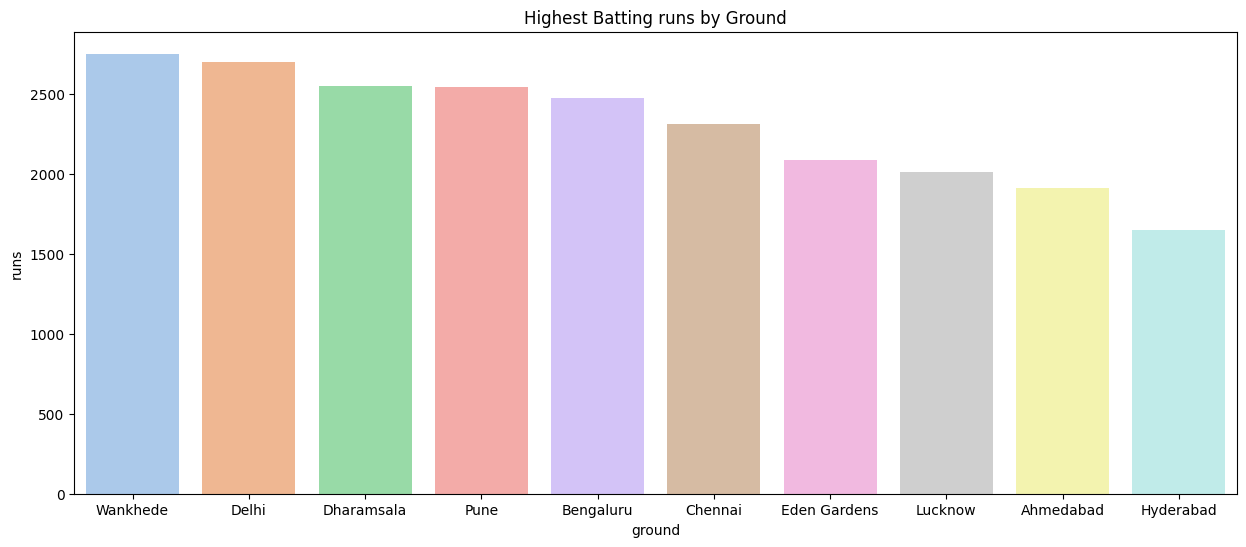

<ipython-input-67-b62e97ef1982>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




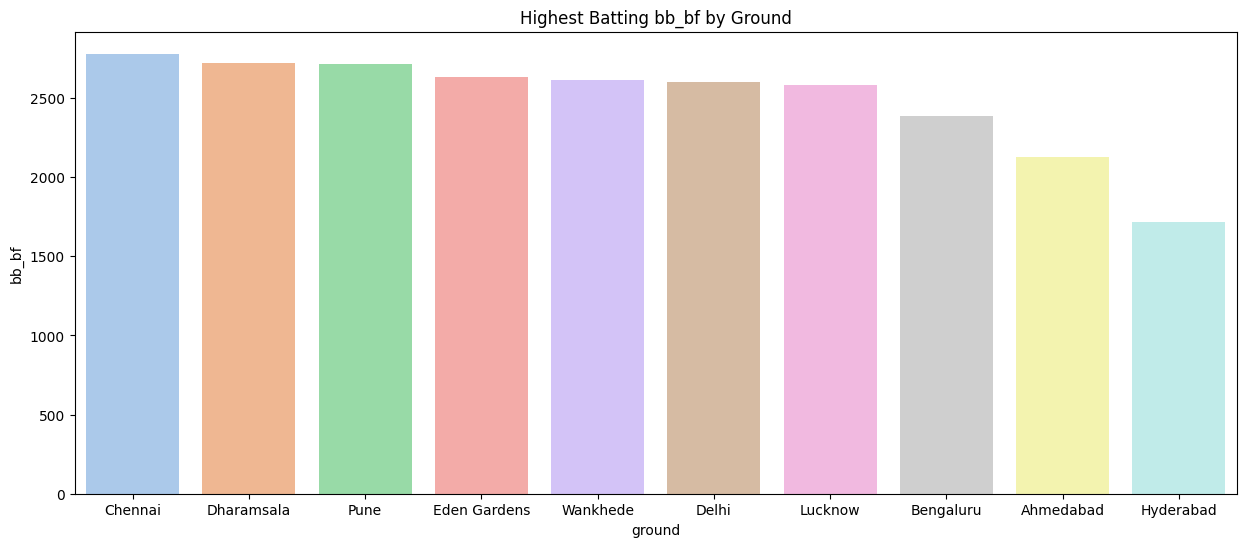

<ipython-input-67-b62e97ef1982>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




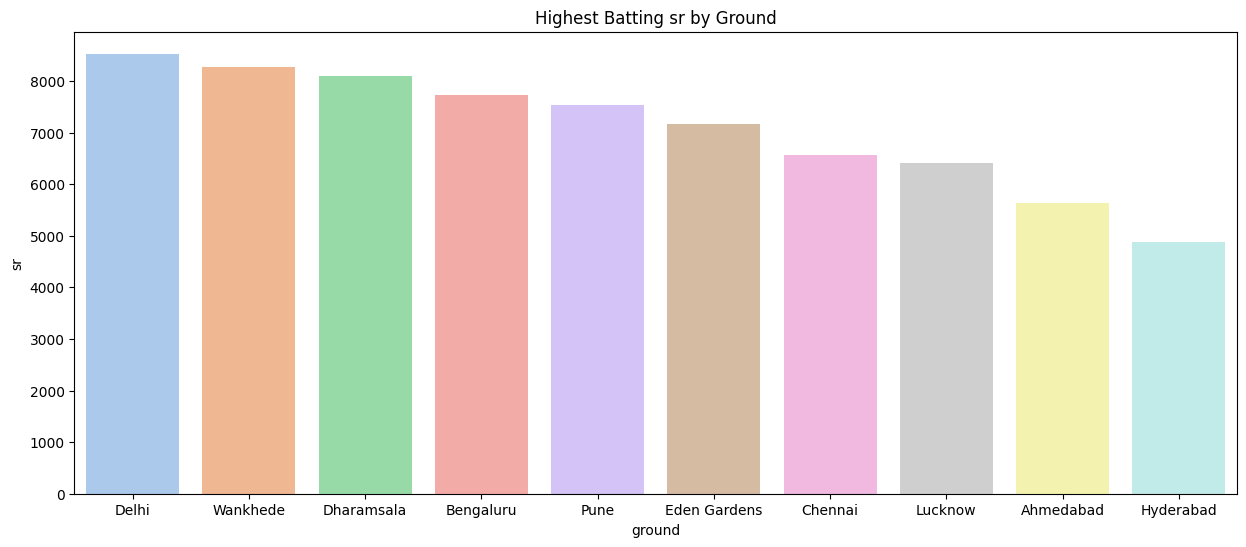

<ipython-input-67-b62e97ef1982>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




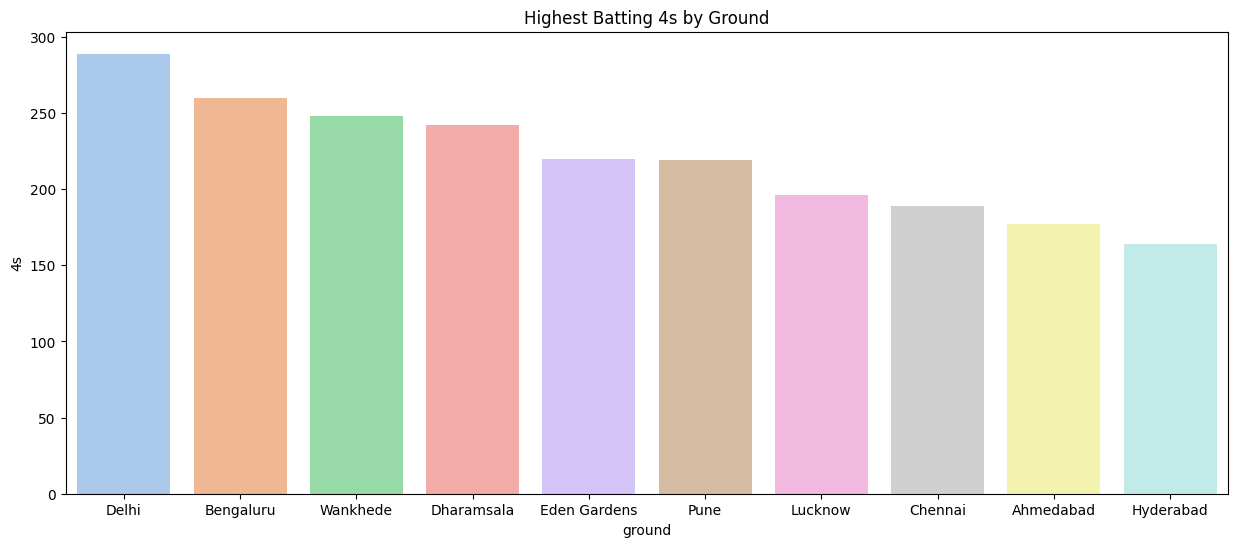

<ipython-input-67-b62e97ef1982>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




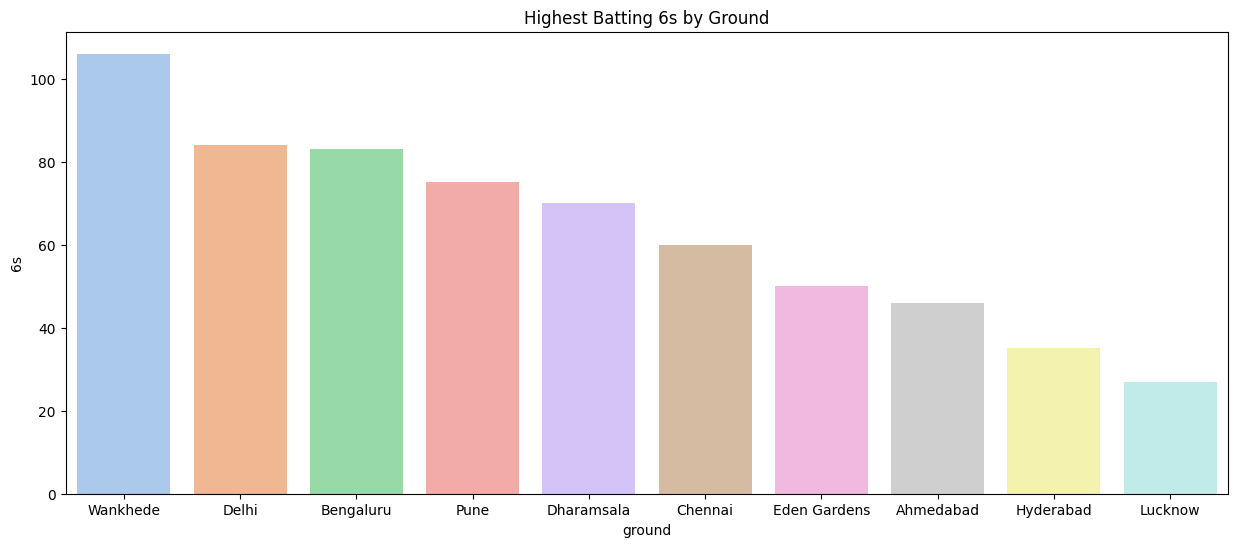

<ipython-input-67-b62e97ef1982>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




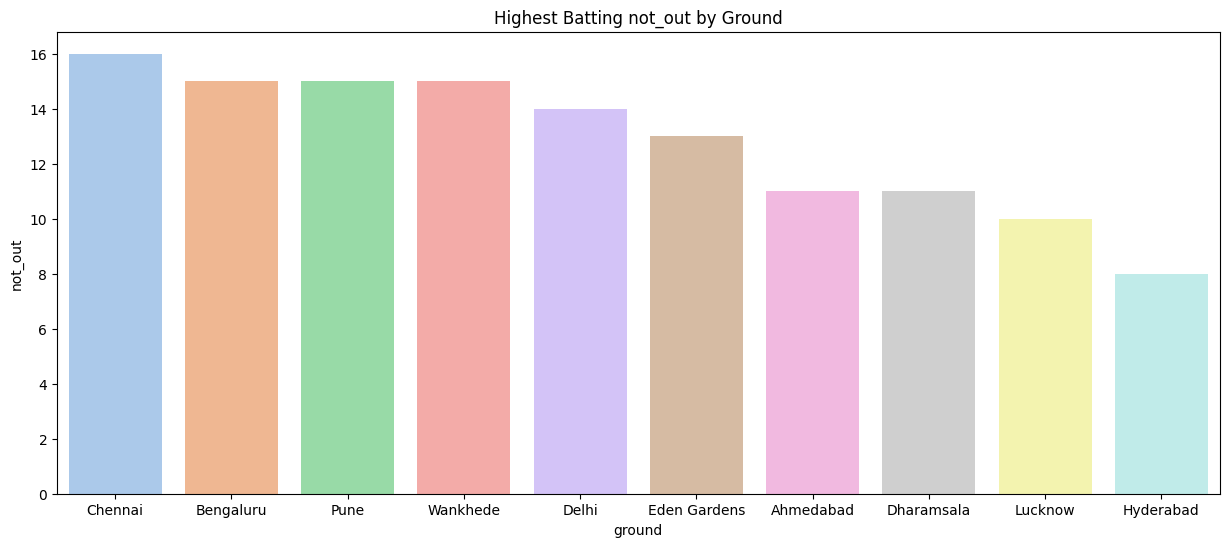

<ipython-input-67-b62e97ef1982>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




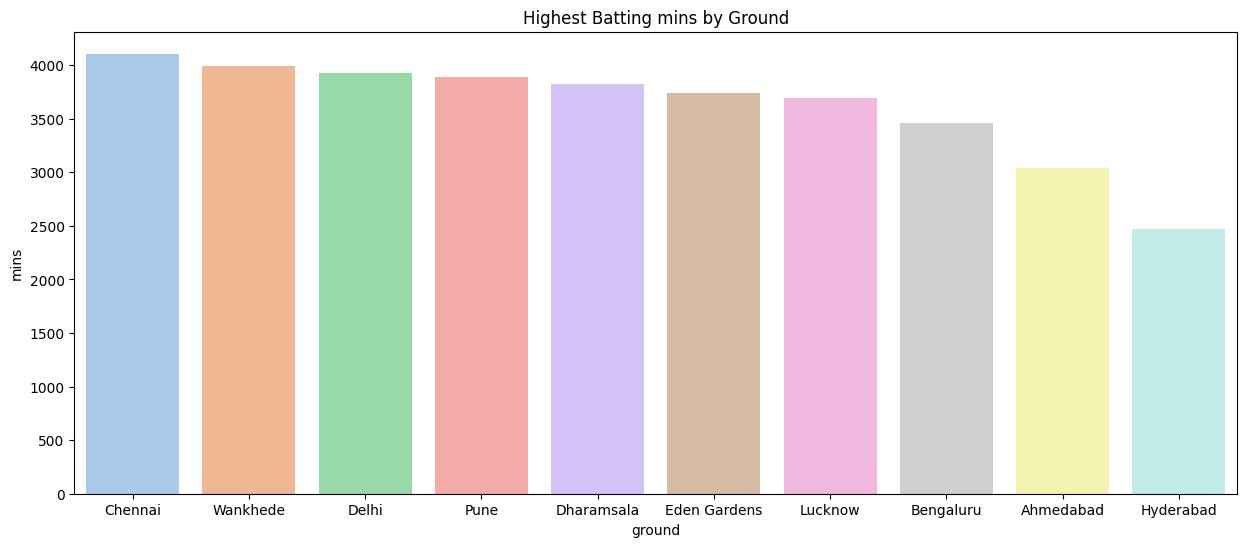

In [67]:
# Group the data by ground and calculate the sum of each batting performance metric
batting_ground_metrics_summary = df[df['bat_or_bowl'] == 'bat'].groupby('ground')[batting_performance_metrics].sum()

# Create a bar plot for each batting performance metric
for metric in batting_performance_metrics:
    plt.figure(figsize=(15, 6))
    sns.barplot(x='ground', y=metric, data=batting_ground_metrics_summary.sort_values(metric, ascending=False),palette='pastel')
    plt.title(f'Highest Batting {metric} by Ground')
    plt.show()

### ***insights***
the previous analysis was about getting to know which play grounds had the best batting performance according to each batting score, and i found that:
- the highest total runs value was on **Wankhede** ground
- the highest total bb_bf value was on **Chennai** ground
- the highest total sr value was on **Delhi** ground
- the highest total 4s value was on **Delhi** ground
- the highest total 6s value was on **Wankhede** ground
- the highest total not_out value was on **Chennai** ground
- the highest total mina value was on **Chennai** ground
- **Hyderabad** and **Ahmedabad** grounds had the lowest batting scores, maybe these grounds aren't suitable for batting.

## **2- bowlnig Opposition and Ground Analysis**

In [68]:
bowlers_against_teams_scores=[]
for col in bowling_performance_metics:
  team_opposition_scores_bowling = df.groupby(['team','opposition'])[col].sum().sort_values(ascending=False).reset_index()
  bowlers_against_teams_scores.append(team_opposition_scores_bowling)

In [69]:
bowlers_against_teams_scores[0].head(10)

,team,opposition,overs
0,AUS,v South Africa,99.4
1,IND,v New Zealand,98.5
2,NZ,v India,98.0
3,SA,v Australia,87.7
4,NED,v New Zealand,50.0
5,NED,v India,50.0
6,IND,v Afghanistan,50.0
7,NZ,v Bangladesh,50.0
8,NZ,v England,50.0
9,PAK,v New Zealand,50.0


In [70]:
bowlers_against_teams_scores[1].head(10)

,team,opposition,mdns
0,NZ,v Sri Lanka,7.0
1,AUS,v South Africa,6.0
2,NED,v Bangladesh,5.0
3,ENG,v India,5.0
4,BAN,v Afghanistan,5.0
5,NZ,v Afghanistan,4.0
6,IND,v Sri Lanka,4.0
7,IND,v England,4.0
8,IND,v Australia,4.0
9,SA,v Australia,4.0


In [71]:
bowlers_against_teams_scores[2].head(10)

,team,opposition,wkts
0,IND,v New Zealand,19.0
1,AUS,v South Africa,17.0
2,SA,v Australia,17.0
3,SA,v Pakistan,10.0
4,ENG,v Australia,10.0
5,ENG,v Bangladesh,10.0
6,ENG,v Pakistan,10.0
7,IND,v Australia,10.0
8,IND,v England,10.0
9,SA,v Bangladesh,10.0


In [72]:
bowlers_against_teams_scores[3].head(10)

,team,opposition,econ
0,NZ,v India,81.78
1,AUS,v South Africa,68.04
2,NZ,v Australia,65.63
3,IND,v New Zealand,59.25
4,NED,v Australia,53.42
5,SL,v Pakistan,53.12
6,BAN,v South Africa,52.64
7,NZ,v South Africa,52.49
8,SA,v Australia,51.52
9,SL,v South Africa,50.95


In [73]:
bowlers_against_teams_scores[4].head(10)

,team,opposition,runs_per_ball
0,NZ,v India,29.167375
1,AUS,v South Africa,25.686442
2,IND,v New Zealand,24.892913
3,NZ,v Australia,22.798036
4,SA,v Australia,20.736405
5,AUS,v New Zealand,19.182411
6,ENG,v South Africa,19.094606
7,SL,v South Africa,18.452967
8,ENG,v New Zealand,18.212098
9,NED,v India,18.124776


In [74]:
team_opposition_scores_bowling = df.groupby(['team','opposition'])[bowling_performance_metics].sum().reset_index()


In [75]:
ind_scores = team_opposition_scores_bowling[team_opposition_scores_bowling['team'] == 'IND']
ind_scores

,team,opposition,overs,mdns,wkts,econ,runs_per_ball
36,IND,v Afghanistan,50.0,0.0,8.0,32.39,10.029161
37,IND,v Australia,49.3,4.0,10.0,27.23,7.489989
38,IND,v Bangladesh,49.6,1.0,8.0,45.15,12.511326
39,IND,v England,34.5,4.0,10.0,18.60,8.768016
40,IND,v Netherlands,44.5,3.0,9.0,47.26,16.469176
41,IND,v New Zealand,98.5,3.0,19.0,59.25,24.892913
42,IND,v Pakistan,42.5,1.0,10.0,27.98,9.884093
43,IND,v South Africa,27.1,3.0,10.0,15.06,10.831718
44,IND,v Sri Lanka,19.4,4.0,10.0,14.98,13.294719


### ***insights***
- the highest **overs** value was between **South Africa** team and  **AUS** with a total overs value of 99.4
- the highest **mdns** value was between **NZ** and **Sri Lanka** with a total mdns value of 7.0
- the highest **wkts** value was between **IND** and **New Zealand** with a total wkts value of 19.0
- the highest **econ** value was between **NZ** and **India** with a total econ value of 81.78
- the highest **runs_per_ball** value was between **NZ** and **India** with a total value of 29.167375

- when i took a closer look to **IND** team and get their sum of scores against all other oppositions, if found that:

  - the max value of total overs was against **New Zealand**
  - the max value of total mdns was against **Australia**,**England** and **Sri Lanka**
  - the max value of total wkts was against **New Zealand**
  - the min value of total econ was against **Sri Lanka**
  - the min value of total runs_per_ball was against **Australia**

## **let's discover which players got the highest bowling scores and their opposition team back then**

In [175]:
for col in bowling_performance_metics:
  x=df.loc[df[col].idxmax(), ['player','opposition']]
  print(f'player {x[0]} had the highest {col} value against {x[1]} ')
  print('-------------------------------------')


player Shaheen Shah Afridi (PAK) had the highest overs value against v South Africa 
-------------------------------------
player Mehidy Hasan Miraz (BAN) had the highest mdns value against v Afghanistan 
-------------------------------------
player Mohammed Shami (IND) had the highest wkts value against v New Zealand 
-------------------------------------
player JDS Neesham (NZ) had the highest econ value against v Australia 
-------------------------------------
player AK Markram (SA) had the highest runs_per_ball value against v New Zealand 
-------------------------------------


## **Examination of performance variations across different play grounds**

In [76]:
for col in bowling_performance_metics:
  x=df.loc[df[col].idxmax(), ['player','ground']]
  print(f'player {x[0]} had the highest {col} value on {x[1]} play ground ')
  print('-------------------------------------')


player Shaheen Shah Afridi (PAK) had the highest overs value on Chennai play ground 
-------------------------------------
player Mehidy Hasan Miraz (BAN) had the highest mdns value on Dharamsala play ground 
-------------------------------------
player Mohammed Shami (IND) had the highest wkts value on Wankhede play ground 
-------------------------------------
player JDS Neesham (NZ) had the highest econ value on Dharamsala play ground 
-------------------------------------
player AK Markram (SA) had the highest runs_per_ball value on Pune play ground 
-------------------------------------


In [77]:
for col in bowling_performance_metics:
  x=df.loc[df[col].idxmin(), ['player','ground']]
  print(f'player {x[0]} had the lowest {col} value on {x[1]} play ground ')
  print('-------------------------------------')


player DJ Mitchell (NZ) had the lowest overs value on Bengaluru play ground 
-------------------------------------
player Shaheen Shah Afridi (PAK) had the lowest mdns value on Chennai play ground 
-------------------------------------
player DJ Mitchell (NZ) had the lowest wkts value on Bengaluru play ground 
-------------------------------------
player Kuldeep Yadav (IND) had the lowest econ value on Eden Gardens play ground 
-------------------------------------
player Taskin Ahmed (BAN) had the lowest runs_per_ball value on Pune play ground 
-------------------------------------


<ipython-input-78-bc44734876ba>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




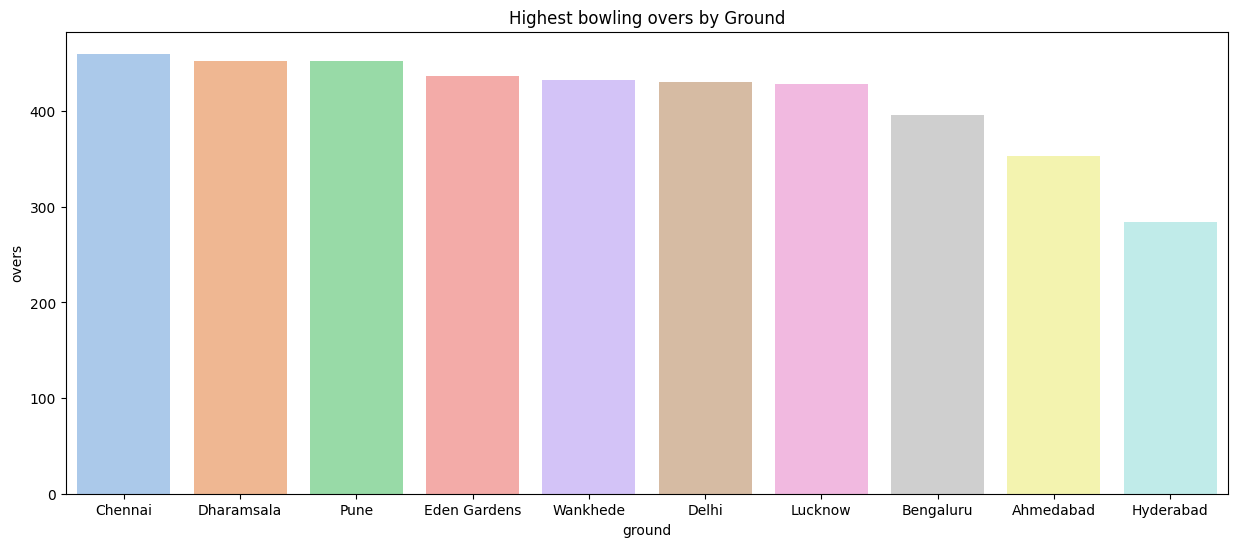

<ipython-input-78-bc44734876ba>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




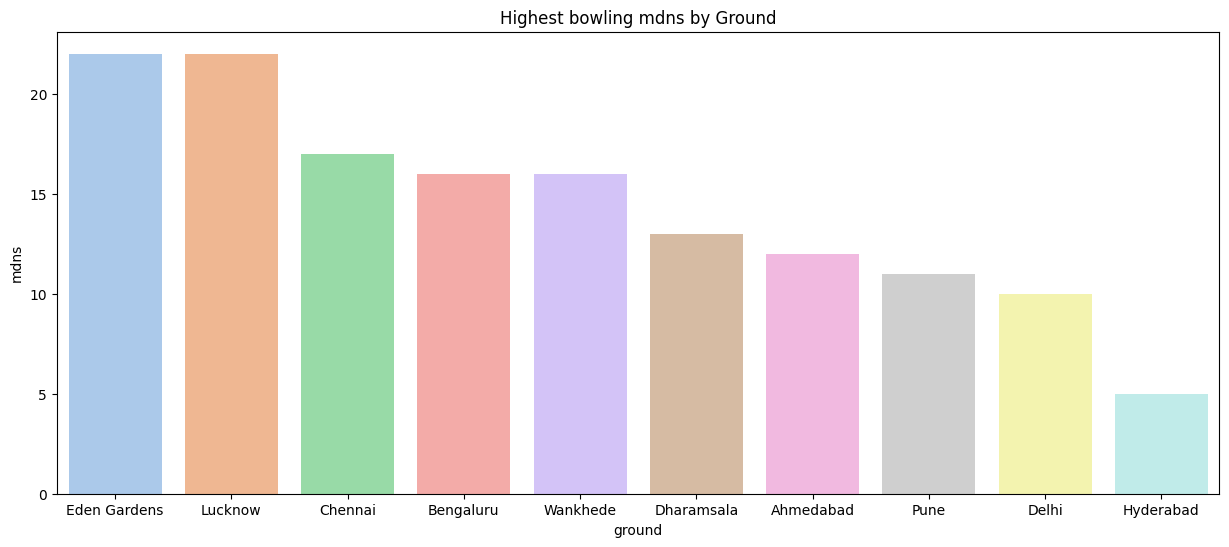

<ipython-input-78-bc44734876ba>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




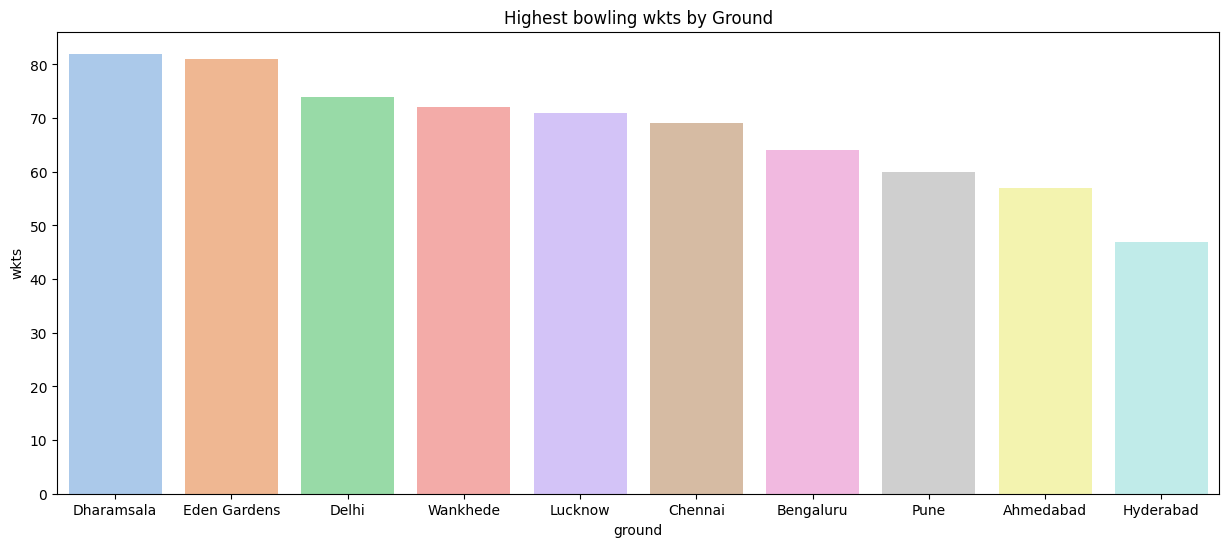

<ipython-input-78-bc44734876ba>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




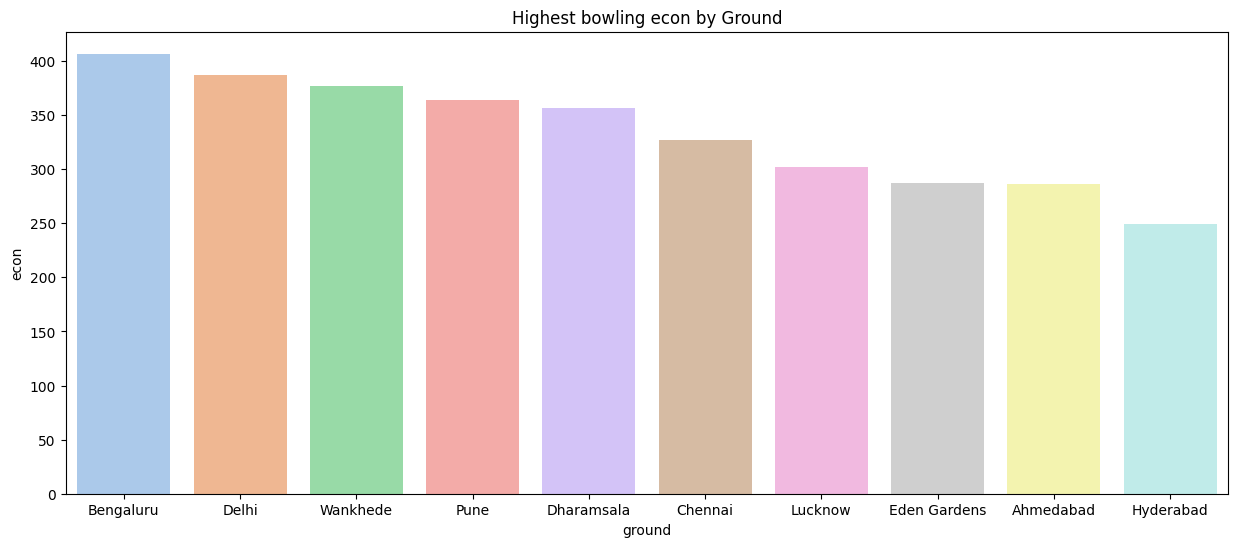

<ipython-input-78-bc44734876ba>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




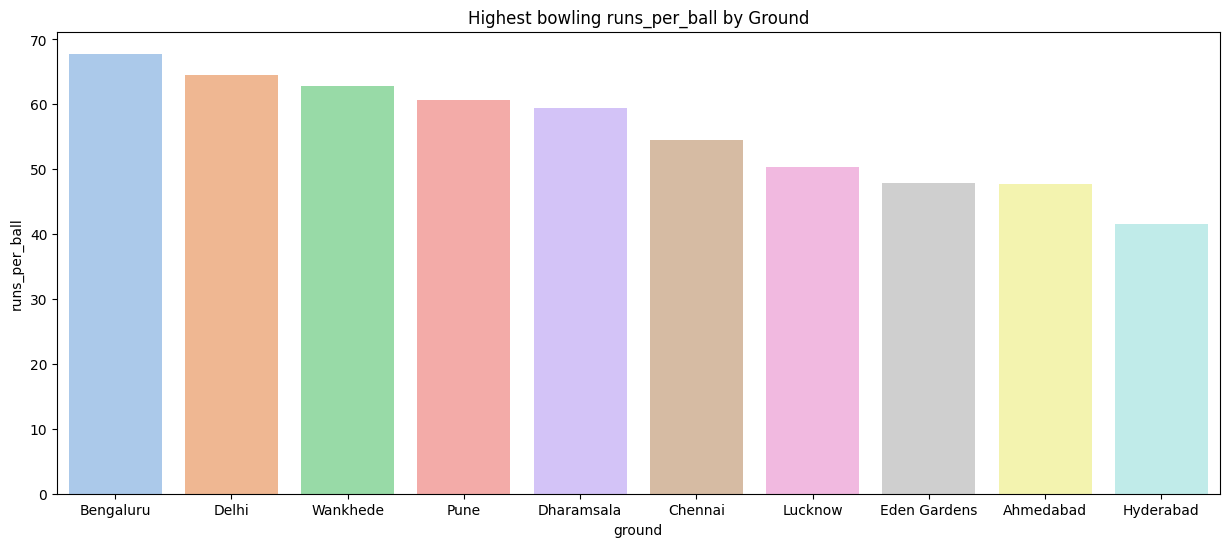

In [78]:
# Group the data by ground and calculate the sum of each batting performance metric
bowling_ground_metrics_summary = df[df['bat_or_bowl'] == 'bowl'].groupby('ground')[bowling_performance_metics].sum()

# Create a bar plot for each batting performance metric
for metric in bowling_ground_metrics_summary:
    plt.figure(figsize=(15, 6))
    sns.barplot(x='ground', y=metric, data=bowling_ground_metrics_summary.sort_values(metric, ascending=False),palette='pastel')
    plt.title(f'Highest bowling {metric} by Ground')
    plt.show()

### ***insights***
the previous analysis was about getting to know which play grounds had the best bowling performance according to each bowling score, and i found that:
- the highest total overs value was on **Chennai** ground
- the highest total mdns value was on **Eden Gardens** ground
- the highest total wkts value was on **Dharamasla** ground
- the lowest total econ value was on **Hyderabad** ground
- the lowest total runs_per_ball value was on **Hyderabad** ground
- it looks like bowlers don't get overs,mdns and wkts good scores on **Hyderabad** and **Ahmedabad** grounds


# **Temporal Analysis**

## **overs played over time,Team analysis**

In [106]:
df['start_date'] = pd.to_datetime(df['start_date'])

<ipython-input-106-057610f33934>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [173]:
teams_overs_overTime=[]
for col in df['team'].unique():
  overs_over_time=df[df['team']==col].groupby(['start_date'])['overs'].sum().sort_index().reset_index()
  teams_overs_overTime.append(overs_over_time)
  draw_px_line_plot(overs_over_time,'overs',col)


### ***insights***
- for **PAK** team,i can't see noticable variants of overs over time, except that they had their lowest overs value on Oct 15
- for **ENG** team, their overs score started to rise over time since Oct 8, but they had thier lowest overs value on Oct 26, but right after this match they made it on Oct 29 with their peak value of 50
- for **NZ** team, they actually started very well in their first day with a peak value of 50 , but i think they got envied in the subsequent matches as they got their lowest overs value on Nov 4, but they got back on their track again in thier next mathces
- for **AFG** team, they started with their lowest overs value on Oct 7, and they got better in next matches till they reached their peak value on Oct 18 of 50 and on Oct 23, and in the subsequent matched there's no noticable variance in their total overs scores which was between 49 and 47.3
- for **NED** team, there was noticable ups and downs in thier score untill they got their lowest value on Nov 3 and they had their peak value on their last day on Nov 12
- for **BAN** team, they got their peak value three times Oct 10 ,Oct 24, Oct 28 and their lowest value on oct 31
- moving forward to **IND** team, they got their peak value on their second matches day Oct 11, no noticable variance in scores untill Oct 22, since then their scores started to get low untill they got thier lowest value no Nov 2, and the line starts to go up in the thier next matches

## **Studying players scores over time**



**analyze according to wkts, 10 players sample**

In [144]:
for col in df['player'].unique()[:10]:
  wkts_over_time=df[df['player']==col].groupby(['start_date'])['wkts'].sum().sort_index().reset_index().head(10)
  draw_px_line_plot(wkts_over_time,'wkts',col)


**analyze according to mdns,10 players sample**

In [146]:
for col in df['player'].unique()[:10]:
  mdns_over_time=df[df['player']==col].groupby(['start_date'])['mdns'].sum().sort_index().reset_index().head(10)
  draw_px_line_plot(mdns_over_time,'mdns',col)

**analyze according to overs,10 players sample**

In [149]:
for col in df['player'].unique()[:10]:
  overs_over_time=df[df['player']==col].groupby(['start_date'])['overs'].sum().sort_index().reset_index().head(10)
  draw_px_line_plot(overs_over_time,'overs',col)